**Q1决策树**

*实现基于信息增益率率进行划分选择的决策树算法，   
对男女生样本数据中的（喜欢颜色，喜欢运动，喜欢文学，鞋码）4个特征进行分类，   
计算模型预测性能（包含 SE、SP、ACC），并以友好的方式图示化结果。*

`1.导入模块`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import metrics
import os

`2.处理数据`

In [2]:
def pre_data(file_path):
    file_data = pd.read_excel(file_path)
    data_color = file_data[["喜欢颜色"]]
    ordinal_encoder = OrdinalEncoder()
    color_encoder = ordinal_encoder.fit_transform(data_color)
    data_feature = np.hstack((color_encoder, pd.DataFrame(file_data,\
                    columns=['喜欢运动', '喜欢文学', '鞋码']).values))
    scaler = preprocessing.StandardScaler().fit(data_feature)
    data_feature = scaler.transform(data_feature)
    data_label = file_data.性别男1女0.values
    return data_feature, data_label

data_feature, data_label = pre_data(os.path.join('data', \
                '作业数据_2021合成.xls'))

`3.数据分层` 

In [3]:
def split_data(data_feature, data_label):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(data_feature, data_label):
        data_train, data_test = data_feature[train_index], data_feature[test_index]
        label_train, label_test = data_label[train_index], data_label[test_index]
    print(len(data_train), len(data_test), len(label_train), len(label_test))
    return data_train, data_test, label_train, label_test

data_train, data_test, label_train, label_test = split_data(data_feature, data_label)

280 71 280 71


`4.训练`

In [4]:
def train(data_train, data_test, label_train, label_test):
    clf = DecisionTreeClassifier(criterion="entropy", random_state=30, 
                                 splitter='random',max_depth=7)
    clf = clf.fit(data_train, label_train)
    acc_train = clf.score(data_train, label_train)
    acc = clf.score(data_test, label_test)
    pred = clf.predict(data_test)
    fpr, tpr, _ = metrics.roc_curve(pred, label_test)
    return acc_train, acc, clf, fpr, tpr

acc_train, acc, clf, fpr, tpr = train(data_train, 
                                      data_test, label_train, label_test)
print('SP:', np.round(1-fpr,4)[1], 'SE:', np.round(tpr,4)[1], 'acc:', np.round(acc,4))

SP: 0.9167 SE: 0.9492 acc: 0.9437


`5.可视化`

[('color', 0.064), ('sport', 0.016), ('literature', 0.0256), ('shoes', 0.8944)]


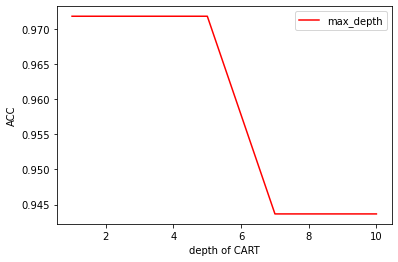

In [5]:
def vitualize(clf):
    tree.export_graphviz(clf)
    dot_data = tree.export_graphviz(clf, out_file=None)
    graphviz.Source(dot_data)

    feature_name = ['color', 'sport', 'literature', 'shoes']
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                    feature_names=['color', 'sport', 'literature', 'shoes'],
                                    class_names=['girl', 'boy'], filled=True, rounded=True,
                                    special_characters=True)
    graphviz.Source(dot_data)
    graph = graphviz.Source(dot_data)
    graph.render("./results/classify")
    print([*zip(feature_name, np.round(clf.feature_importances_,4))])  #信息增益率

    test = []
    for i in range(10):
        clf = tree.DecisionTreeClassifier(criterion="entropy", 
                                          random_state=30, 
                                          splitter='random', 
                                          max_depth=i + 1)
        clf = clf.fit(data_train, label_train)
        acc = clf.score(data_test, label_test)
        test.append(acc)
    plt.plot(range(1, 11), test, color="red", label="max_depth")
    plt.xlabel('depth of CART')
    plt.ylabel('ACC')
    plt.legend()
    plt.show()

vitualize(clf)